In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [341]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)


In [342]:
crime=pd.read_csv("phase 4.csv")
crime

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,THEFT,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,50,46,199,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,23,53,366,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,27,59,723,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,20,25,173,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,23,49,1021,6507
...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,7,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,7,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,81,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,7,17,577,3494


In [343]:
crime.shape

(9017, 8)

In [344]:
crime.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'RAPE',
       'KIDNAPPING & ABDUCTION', 'THEFT', 'TOTAL IPC CRIMES'],
      dtype='object')

In [345]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   STATE/UT                9017 non-null   object
 1   DISTRICT                9017 non-null   object
 2   YEAR                    9017 non-null   int64 
 3   MURDER                  9017 non-null   int64 
 4   RAPE                    9017 non-null   int64 
 5   KIDNAPPING & ABDUCTION  9017 non-null   int64 
 6   THEFT                   9017 non-null   int64 
 7   TOTAL IPC CRIMES        9017 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 563.7+ KB


In [346]:
crime.isnull().sum()

STATE/UT                  0
DISTRICT                  0
YEAR                      0
MURDER                    0
RAPE                      0
KIDNAPPING & ABDUCTION    0
THEFT                     0
TOTAL IPC CRIMES          0
dtype: int64

In [347]:
crime.describe()

,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,THEFT,TOTAL IPC CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,53.041366,79.152046,776.428968,5310.115116
std,3.463623,327.27503,190.741450,317.630964,2935.008640,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,8.000000,10.000000,88.000000,853.000000
50%,2007.000000,38.00000,20.000000,25.000000,217.000000,2096.000000
75%,2010.000000,66.00000,41.000000,56.000000,466.000000,3972.000000
max,2012.000000,7601.00000,3425.000000,8878.000000,53449.000000,220335.000000


In [348]:
index_name=crime[crime['DISTRICT']=='TOTAL'].index #dropping the DISTRICT WHICH SHOWS VALUE AS TOTAL
crime.drop(index_name, inplace=True)
crime

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,THEFT,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,50,46,199,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,23,53,366,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,27,59,723,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,20,25,173,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,23,49,1021,6507
...,...,...,...,...,...,...,...,...
9010,DELHI UT,STF,2012,0,0,0,0,6
9011,DELHI UT,WEST,2012,52,79,454,2352,5558
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,7,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,81,787


In [349]:
features=['YEAR','MURDER','RAPE','THEFT','KIDNAPPING & ABDUCTION']

In [350]:
crime=crime[features].copy()
crime

,YEAR,MURDER,RAPE,THEFT,KIDNAPPING & ABDUCTION
0,2001,101,50,199,46
1,2001,151,23,366,53
2,2001,101,27,723,59
3,2001,80,20,173,25
4,2001,82,23,1021,49
...,...,...,...,...,...
9010,2012,0,0,0,0
9011,2012,52,79,2352,454
9012,2012,0,0,7,0
9014,2012,5,6,81,2


In [351]:
df_crime=preprocessing.scale(crime)
print(df_crime)
df_crime=pd.DataFrame(df_standardize)
df_crime

[[-1.62684555  1.15834478  0.59007973 -0.22252755  0.01610873]
 [-1.62684555  2.24048826 -0.15177026 -0.06405962  0.08508417]
 [-1.62684555  1.15834478 -0.04186656  0.27470117  0.14420598]
 ...
 [ 1.54881143 -1.02758504 -0.78371655 -0.40471823 -0.43715845]
 [ 1.54881143 -0.9193707  -0.61886099 -0.33449891 -0.41745118]
 [ 1.54881143 -0.50815617 -0.59138507  0.13616034 -0.26964667]]


,0,1,2,3,4
0,-1.626846,1.158345,0.590080,-0.222528,0.016109
1,-1.626846,2.240488,-0.151770,-0.064060,0.085084
2,-1.626846,1.158345,-0.041867,0.274701,0.144206
3,-1.626846,0.703845,-0.234198,-0.247199,-0.190818
4,-1.626846,0.747130,-0.151770,0.557476,0.045670
...,...,...,...,...,...
8604,1.548811,-1.027585,-0.783717,-0.411361,-0.437158
8605,1.548811,0.097844,1.386882,1.820475,4.036392
8606,1.548811,-1.027585,-0.783717,-0.404718,-0.437158
8607,1.548811,-0.919371,-0.618861,-0.334499,-0.417451


In [352]:
plt.figure(figsize=(6,4))
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='random',random_state=42)
    kmeans.fit(df_crime)
    wcss.append(kmeans.inertia_)


<Figure size 432x288 with 0 Axes>

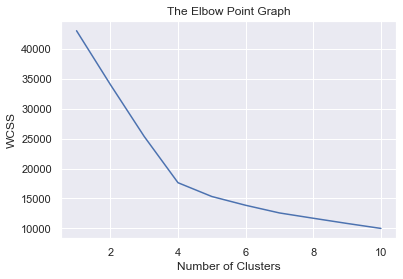

In [353]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

optimum clusters = 3

In [360]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(df_crime)

Y

array([3, 3, 3, ..., 2, 2, 2])

In [361]:
y_kmeans1=Y+1
cluster=list(y_kmeans1)
crime['cluster']=cluster

In [362]:
kmeans_mean_cluster =pd.DataFrame(round(crime.groupby('cluster').mean(),1))
kmeans_mean_cluster

,YEAR,MURDER,RAPE,THEFT,KIDNAPPING & ABDUCTION
cluster,,,,,
1,2007.1,119.5,72.8,1357.2,127.0
2,2006.5,517.1,535.3,19295.5,2090.2
3,2009.6,33.5,22.1,268.0,32.7
4,2003.5,38.0,19.7,255.4,24.0


Text(0.5, 0, 'clusters')

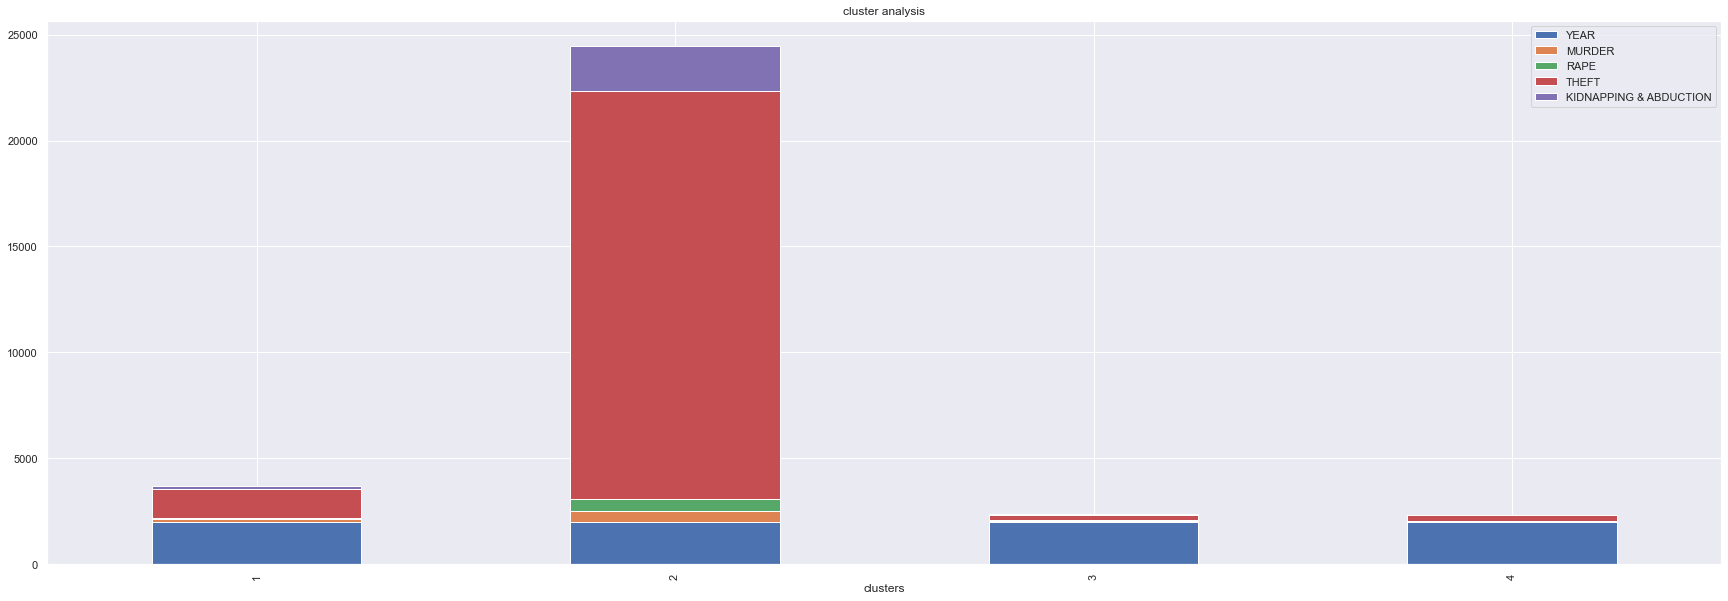

In [363]:
kmeans_mean_cluster.plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"]=(30,10)
plt.title("cluster analysis")
plt.xlabel("clusters")

In [366]:
kmeans=KMeans(n_clusters=4, init='random',max_iter=300, n_init=10,random_state=0)
pred_y=kmeans.fit_predict(df_crime)


plt.scatter(df_crime[Y==0,0],df_crime[Y==0,1],s=50,c='green',label='cluster 1')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')
plt.show()

KeyError: (array([False, False, False, ..., False, False, False]), 0)

In [367]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df_crime['MURDER'], y=df_crime['RAPE'],hue=y_kmeans1)

KeyError: 'MURDER'

<Figure size 864x432 with 0 Axes>

In [ ]:
#crime=crime[['STATE/UT','YEAR','MURDER','KIDNAPPING & ABDUCTION','THEFT']].copy()
#crime

In [ ]:

g = pd.DataFrame(crime.groupby(['YEAR']).sum().reset_index())
g

In [ ]:
rape = pd.DataFrame(crime.groupby(['YEAR'])['RAPE'].sum().reset_index())
rape.columns = ['YEAR','RAPE']
rape

In [ ]:
plt.scatter(rape.YEAR,rape['RAPE'])
plt.xlabel('YEAR')
plt.ylabel('RAPE')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(rape[['YEAR','RAPE']])
y_predicted

In [ ]:
rape['cluster']=y_predicted
rape.head()

In [ ]:
km.cluster_centers_

In [ ]:
df1 = rape[rape.cluster==0]
df2 = rape[rape.cluster==1]
df3 = rape[rape.cluster==2]

plt.scatter(df1.YEAR,df1['RAPE'],color='green')
plt.scatter(df2.YEAR,df2['RAPE'],color='red')
plt.scatter(df3.YEAR,df3['RAPE'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('YEAR')
plt.ylabel('RAPE')
plt.legend()

Preprocessing using min max scaler

In [ ]:
scaler = MinMaxScaler()

scaler.fit(rape[['RAPE']])
rape['RAPE'] = scaler.transform(rape[['RAPE']])

In [ ]:
rape

In [ ]:
plt.scatter(rape.YEAR,rape['RAPE'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(rape[['YEAR','RAPE']])
y_predicted

In [ ]:
rape['cluster']=y_predicted
rape.head()

In [ ]:
km.cluster_centers_

In [ ]:
df1 = rape[rape.cluster==0]
df2 = rape[rape.cluster==1]
df3 = rape[rape.cluster==2]

plt.scatter(df1.YEAR,df1['RAPE'],color='green')
plt.scatter(df2.YEAR,df2['RAPE'],color='red')
plt.scatter(df3.YEAR,df3['RAPE'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('YEAR')
plt.ylabel('RAPE')
plt.legend()

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(rape[['YEAR','RAPE']])
    sse.append(km.inertia_)

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
fig = px.bar(rape,x='YEAR',y='RAPE',color_discrete_sequence=['blue'])
fig.show()

In [ ]:
rape_state = pd.DataFrame(crime.groupby(['STATE/UT'])['RAPE'].sum().reset_index())
rape_state.columns = ['STATE/UT','RAPE']
rape_state

In [ ]:
rape_state.head(10)

In [ ]:
fig = px.bar(rape_state,x='STATE/UT',y='RAPE',color_discrete_sequence=['blue'])
fig.show()

MURDER

In [ ]:
murder = pd.DataFrame(crime.groupby(['YEAR'])['MURDER'].sum().reset_index())
murder.columns = ['YEAR','MURDER']
murder

In [ ]:
fig = px.bar(murder,x='YEAR',y='MURDER',color_discrete_sequence=['blue'])
fig.show()